In [ ]:
#Importing required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import re 
import plotly.express as px 
import plotly.graph_objs as go 
import plotly.figure_factory as ff 
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
#Loading dataset 
df = pd.read_csv("/content/drive/MyDrive/Data_Analysis/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.shape

(8807, 12)

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
#missing values in dataset 
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
#let's see the percentage of missing values 
np.round(df.isnull().sum() / df.shape[0] * 100, 2).sort_values(ascending = False)

director        29.91
country          9.44
cast             9.37
date_added       0.11
rating           0.05
duration         0.03
show_id          0.00
type             0.00
title            0.00
release_year     0.00
listed_in        0.00
description      0.00
dtype: float64

- We can see that percentage of missing values in director is more, then in order to handle missing values we can drop the column from dataset.

In [ ]:
df.director.value_counts().head(10)

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: director, dtype: int64

In [ ]:
#Movies vs TVShows 

go.Figure(data = [go.Pie(labels = df.type.value_counts(normalize = True).index,
                         values = df.type.value_counts(normalize = True).values, hole = .5,
                         title = 'Movies vs TV Shows')]) 

 - From the above plot we can say that there are 69.6% for Movies title and 30.4% for TV shows titles.

In [ ]:
df.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [ ]:
df.rating.value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

<Axes: xlabel='rating'>

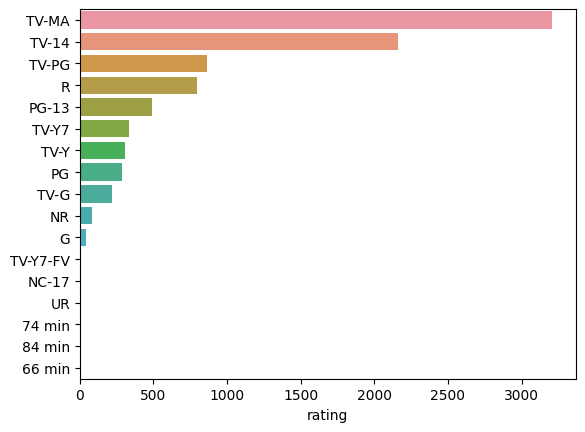

In [ ]:
sns.barplot(y = df.rating.value_counts().index, x = df.rating.value_counts(), data = df, orient = 'h')

### Observation :- 
 - From the above plot, we can say that the highest count - 'TV-MA' is the rating that shows that a program is intended for adults. 
 - 'MA' stands for 'mature audiences'. 
 - Children aged 17 and younger should not watch these programs. 
 - Second largest is the 'TV-14', 'TV-14 program is meant for children over 14 years of age. It is generally not recommended to let children watch the program without parental attendance, or at least without them vetting is first. It can containg the use of harmful substances, strong language, violence. 
 - Third largest is the very popular 'R' rating, R is short for the retricted. So any young person under 17 should not watch. 

In [ ]:
df.country.value_counts().head(10)

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

<Axes: xlabel='release_year', ylabel='count'>

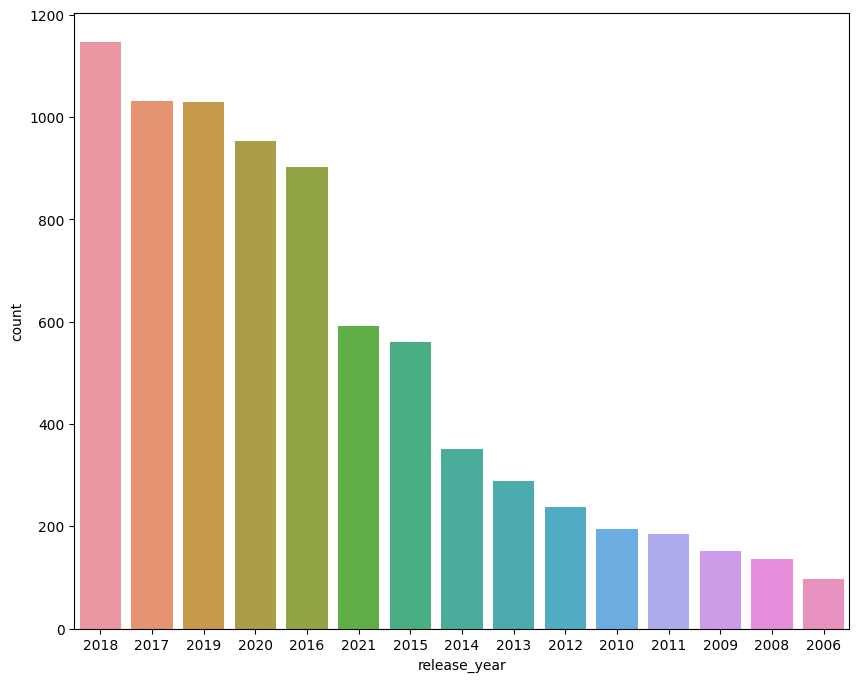

In [ ]:
#Year wise count 
plt.figure(figsize = (10, 8)) 
sns.countplot(x= 'release_year', data = df, order= df.release_year.value_counts().index[0:15])

### Observation :-  
 - From the above plot we can say that in 2018 year more content release by Netflix. 
 - Follow by 2017 , 2019 year to release more content.

In [33]:
#Top 10 directors 
df.director.value_counts().head(10)

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: director, dtype: int64

In [34]:
#Top 10 listed content movie or tv shows 
df.listed_in.value_counts().head(10)

Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: listed_in, dtype: int64

<Axes: xlabel='count', ylabel='listed_in'>

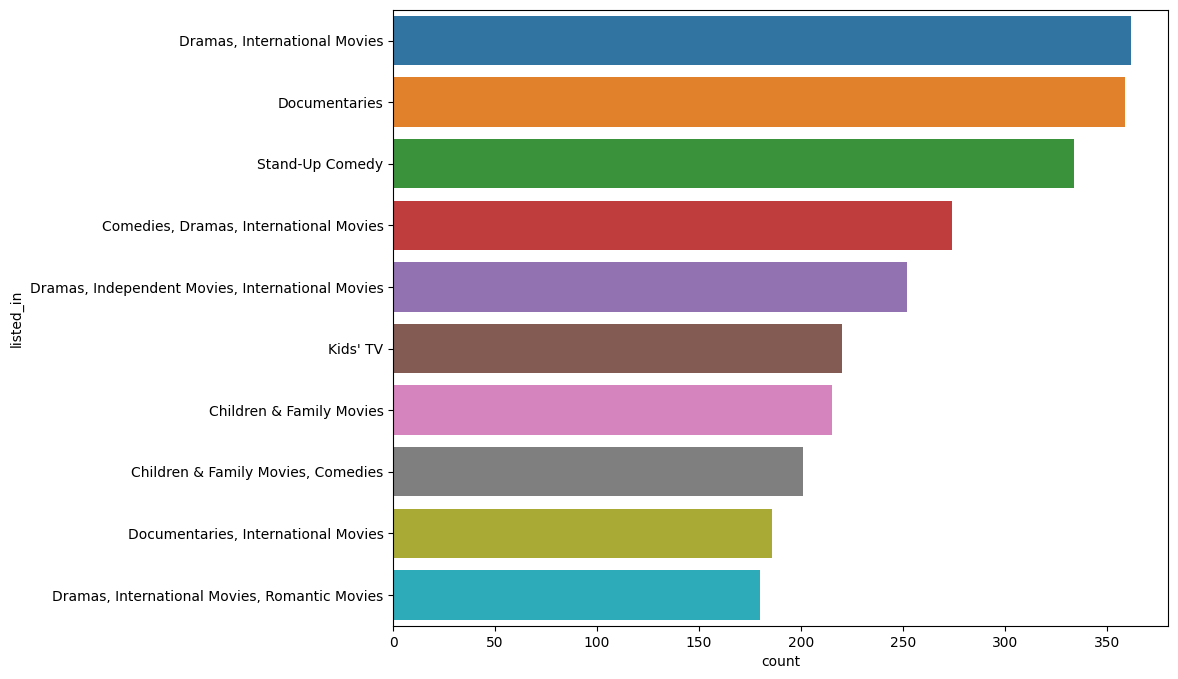

In [38]:
plt.figure(figsize = (10, 8)) 
sns.countplot(y= 'listed_in', data = df, order= df.listed_in.value_counts().index[0:10])

### Observation :- 
 - Dramas, International movies has more content follow by documentries , standup - comedy

### Handling Missing Values

In [39]:
np.round(df.isnull().sum() / df.shape[0] * 100, 2)

show_id          0.00
type             0.00
title            0.00
director        29.91
cast             9.37
country          9.44
date_added       0.11
release_year     0.00
rating           0.05
duration         0.03
listed_in        0.00
description      0.00
dtype: float64

In [40]:
#Dropping rows for very less number of missing values 
df.dropna(subset = ['rating', 'duration'], axis = 0, inplace = True)

In [42]:
df.dropna(subset = ['date_added'], axis = 0, inplace = True)

In [50]:
np.round(df.isnull().sum() / df.shape[0] * 100, 2)

show_id          0.00
type             0.00
title            0.00
director        29.82
cast             0.00
country          0.00
date_added       0.00
release_year     0.00
rating           0.00
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

In [45]:
df.country.value_counts().head(10)

United States     2809
India              972
United Kingdom     418
Japan              243
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

In [46]:
#replacing null value by unknown value in country 
df['country'].fillna('Unknown', inplace = True)

In [48]:
df.cast.value_counts().head(10)

David Attenborough                                                                                                        19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                   14
Samuel West                                                                                                               10
Jeff Dunham                                                                                                                7
David Spade, London Hughes, Fortune Feimster                                                                               6
Kevin Hart                                                                                                                 6
Craig Sechler                                                                                                              6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath     6


In [49]:
#replacing nan value by 'No Cast' in cast  column 
df['cast'].fillna('No Cast', inplace = True)

In [51]:
df.director.value_counts().head(10)

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Jay Chapman               12
Youssef Chahine           12
Steven Spielberg          11
Name: director, dtype: int64

In [52]:
#replacing nan value by 'unknow director' in director column 
df['director'].fillna('Unknown director', inplace = True)

In [55]:
np.round(df.isnull().sum() / df.shape[0] * 100, 2)

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

In [56]:
df.type.value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

In [58]:
movies = df[df.type == 'Movie'] 
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [59]:
tv_shows = df[df.type == 'TV Show'] 
tv_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown director,No Cast,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [60]:
movies.shape

(6126, 12)

In [61]:
tv_shows.shape

(2664, 12)

In [63]:
movies.duration.head(20) 

0      90 min
6      91 min
7     125 min
9     104 min
12    127 min
13     91 min
16     67 min
18     94 min
22    161 min
23     61 min
24    166 min
26    147 min
27    103 min
28     97 min
29    106 min
30    111 min
35    110 min
36    105 min
38     96 min
41    124 min
Name: duration, dtype: object

In [65]:
movies.duration = movies.duration.apply(lambda x: x.replace(" min", "") if 'min' in x else x) 

In [66]:
movies.duration.head(20)

0      90
6      91
7     125
9     104
12    127
13     91
16     67
18     94
22    161
23     61
24    166
26    147
27    103
28     97
29    106
30    111
35    110
36    105
38     96
41    124
Name: duration, dtype: object

In [73]:
movies.duration.dtype

dtype('O')

In [74]:
movies.duration = movies.duration.astype('int64')

In [77]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6126 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6126 non-null   object
 1   type          6126 non-null   object
 2   title         6126 non-null   object
 3   director      6126 non-null   object
 4   cast          6126 non-null   object
 5   country       6126 non-null   object
 6   date_added    6126 non-null   object
 7   release_year  6126 non-null   int64 
 8   rating        6126 non-null   object
 9   duration      6126 non-null   int64 
 10  listed_in     6126 non-null   object
 11  description   6126 non-null   object
dtypes: int64(2), object(10)
memory usage: 622.2+ KB


In [80]:
movies.describe()

,release_year,duration
count,6126.000000,6126.000000
mean,2013.120144,99.584884
std,9.681723,28.283225
min,1942.000000,3.000000
25%,2012.000000,87.000000
50%,2016.000000,98.000000
75%,2018.000000,114.000000
max,2021.000000,312.000000


In [78]:
#let's see the shortest movie 
shortest_movie = movies[movies.duration == np.min(movies.duration)] 
shortest_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3777,s3778,Movie,Silent,"Limbert Fabian, Brandon Oldenburg",No Cast,United States,"June 4, 2019",2014,TV-Y,3,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ..."


In [79]:
longest_movie = movies[movies.duration == np.max(movies.duration)] 
longest_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4253,s4254,Movie,Black Mirror: Bandersnatch,Unknown director,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",2018,TV-MA,312,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question..."


In [81]:
tv_shows.duration.head(10)

1     2 Seasons
2      1 Season
3      1 Season
4     2 Seasons
5      1 Season
8     9 Seasons
10     1 Season
11     1 Season
14     1 Season
15    4 Seasons
Name: duration, dtype: object

In [82]:
tv_shows.duration = tv_shows.duration.apply(lambda x: x.replace(" Seasons", "") if 'Seasons' in x else x) 
tv_shows.duration.head(10)

1            2
2     1 Season
3     1 Season
4            2
5     1 Season
8            9
10    1 Season
11    1 Season
14    1 Season
15           4
Name: duration, dtype: object

In [83]:
tv_shows.duration = tv_shows.duration.apply(lambda x: x.replace(" Season", "") if 'Season' in x else x) 
tv_shows.duration.head(10)

1     2
2     1
3     1
4     2
5     1
8     9
10    1
11    1
14    1
15    4
Name: duration, dtype: object

In [84]:
tv_shows.duration = tv_shows.duration.astype('int64')

In [86]:
tv_shows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2664 entries, 1 to 8803
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       2664 non-null   object
 1   type          2664 non-null   object
 2   title         2664 non-null   object
 3   director      2664 non-null   object
 4   cast          2664 non-null   object
 5   country       2664 non-null   object
 6   date_added    2664 non-null   object
 7   release_year  2664 non-null   int64 
 8   rating        2664 non-null   object
 9   duration      2664 non-null   int64 
 10  listed_in     2664 non-null   object
 11  description   2664 non-null   object
dtypes: int64(2), object(10)
memory usage: 270.6+ KB


In [87]:
tv_shows.describe()

,release_year,duration
count,2664.000000,2664.000000
mean,2016.627628,1.751877
std,5.735194,1.550622
min,1925.000000,1.000000
25%,2016.000000,1.000000
50%,2018.000000,1.000000
75%,2020.000000,2.000000
max,2021.000000,17.000000


In [97]:
longest_shows = tv_shows.loc[(tv_shows['duration'])>13]  
longest_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
548,s549,TV Show,Grey's Anatomy,Unknown director,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,"July 3, 2021",2020,TV-14,17,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...
2423,s2424,TV Show,Supernatural,Phil Sgriccia,"Jared Padalecki, Jensen Ackles, Mark Sheppard,...","United States, Canada","June 5, 2020",2019,TV-14,15,"Classic & Cult TV, TV Action & Adventure, TV H...","Siblings Dean and Sam crisscross the country, ..."
4798,s4799,TV Show,NCIS,Unknown director,"Mark Harmon, Michael Weatherly, Pauley Perrett...",United States,"July 1, 2018",2017,TV-14,15,"Crime TV Shows, TV Dramas, TV Mysteries",Follow the quirky agents of the NCIS – the Nav...


In [98]:
longest_shows.rating.value_counts()

TV-14    3
Name: rating, dtype: int64